# **Credit Card Default Prediction:-**

# **Import Library:-**

In [426]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Data:-**

In [427]:
credit = pd.read_csv('/content/fraudTrain.csv',index_col=0)

# **Data Structure Analysis:-**

In [428]:
credit.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0


In [429]:
credit.tail(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1281378,2020-06-15 16:38:04,6011329966782895,fraud_Crooks and Sons,personal_care,54.65,Lauren,Butler,F,030 Seth Divide Suite 355,Tulsa,...,36.0557,-96.0602,413574,"Teacher, special educational needs",1971-09-01,f151ae08277391ab346b26a318832e4a,1.371314e+09,36.011599,-95.215768,0.0
1281379,2020-06-15 16:38:36,3575540972310993,fraud_Baumbach Ltd,personal_care,23.06,Rachel,Villarreal,F,250 Carrie Throughway,University,...,34.3396,-89.5736,4198,Curator,2001-06-22,f9b,NaN,NaN,NaN,NaN


# **Identifying Missing Value In Datasets:-**

In [430]:
credit.shape

(1281380, 22)

In [431]:
credit.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

# **Descriptive Statistics:-**

In [432]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1281380 entries, 0 to 1281379
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1281380 non-null  object 
 1   cc_num                 1281380 non-null  int64  
 2   merchant               1281380 non-null  object 
 3   category               1281380 non-null  object 
 4   amt                    1281380 non-null  float64
 5   first                  1281380 non-null  object 
 6   last                   1281380 non-null  object 
 7   gender                 1281380 non-null  object 
 8   street                 1281380 non-null  object 
 9   city                   1281380 non-null  object 
 10  state                  1281380 non-null  object 
 11  zip                    1281380 non-null  int64  
 12  lat                    1281380 non-null  float64
 13  long                   1281380 non-null  float64
 14  city_pop               

In [433]:
credit.describe(include='all')

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,1281380,1.281380e+06,1281380,1281380,1.281380e+06,1281380,1281380,1281380,1281380,1281380,...,1.281380e+06,1.281380e+06,1.281380e+06,1281380,1281380,1281380,1.281379e+06,1.281379e+06,1.281379e+06,1.281379e+06
unique,1259771,NaN,693,14,NaN,352,481,2,983,894,...,NaN,NaN,NaN,494,968,1281380,NaN,NaN,NaN,NaN
top,2019-04-22 16:02:01,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,4664 Sanchez Common Suite 930,Birmingham,...,NaN,NaN,NaN,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9,NaN,NaN,NaN,NaN
freq,4,NaN,4341,130081,NaN,26329,28461,701559,3086,5555,...,NaN,NaN,NaN,9666,5565,1,NaN,NaN,NaN,NaN
mean,NaN,4.173086e+17,NaN,NaN,7.031698e+01,NaN,NaN,NaN,NaN,NaN,...,3.853797e+01,-9.022448e+01,8.882904e+04,NaN,NaN,NaN,1.348977e+09,3.853779e+01,-9.022460e+01,5.736008e-03
std,NaN,1.308971e+18,NaN,NaN,1.601899e+02,NaN,NaN,NaN,NaN,NaN,...,5.075343e+00,1.375627e+01,3.019031e+05,NaN,NaN,NaN,1.268298e+07,5.109343e+00,1.376829e+01,7.551894e-02
min,NaN,6.041621e+10,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,...,2.002710e+01,-1.656723e+02,2.300000e+01,NaN,NaN,NaN,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,NaN,1.800429e+14,NaN,NaN,9.650000e+00,NaN,NaN,NaN,NaN,NaN,...,3.466890e+01,-9.679800e+01,7.430000e+02,NaN,NaN,NaN,1.338665e+09,3.473452e+01,-9.689454e+01,0.000000e+00
50%,NaN,3.521417e+15,NaN,NaN,4.750000e+01,NaN,NaN,NaN,NaN,NaN,...,3.935430e+01,-8.747690e+01,2.456000e+03,NaN,NaN,NaN,1.348944e+09,3.936581e+01,-8.743766e+01,0.000000e+00
75%,NaN,4.642255e+15,NaN,NaN,8.311000e+01,NaN,NaN,NaN,NaN,NaN,...,4.194040e+01,-8.015800e+01,2.032800e+04,NaN,NaN,NaN,1.358818e+09,4.195759e+01,-8.023556e+01,0.000000e+00


# **Data Cleaning Process:-**

In [434]:
credit.drop(columns='cc_num',inplace=True)

In [435]:
credit.drop(columns='trans_num',inplace=True)

# **Data Preprocessing**

In [436]:
credit.insert(loc=3, column='Name', value=credit['first'] + " " + credit['last'])

In [437]:
credit.drop(columns='first',inplace=True)

In [438]:
credit.drop(columns='last',inplace=True)

# **Merchant Groupby And Aggregates Function**

In [439]:
merchant_agg = credit.groupby(by='merchant').agg({'amt':'sum'}).reset_index()

In [440]:
top_5_merchant = merchant_agg.sort_values(by='amt',ascending=False,ignore_index=True).head()

In [441]:
top_5_merchant

,merchant,amt
0,fraud_Kilback LLC,385870.23
1,fraud_Bradtke PLC,298739.58
2,"fraud_Schumm, Bauch and Ondricka",296959.70
3,fraud_Hackett-Lueilwitz,296773.90
4,fraud_Doyle Ltd,296490.43


Text(0.5, 1.0, 'Top 5 Merchant in Count Based')

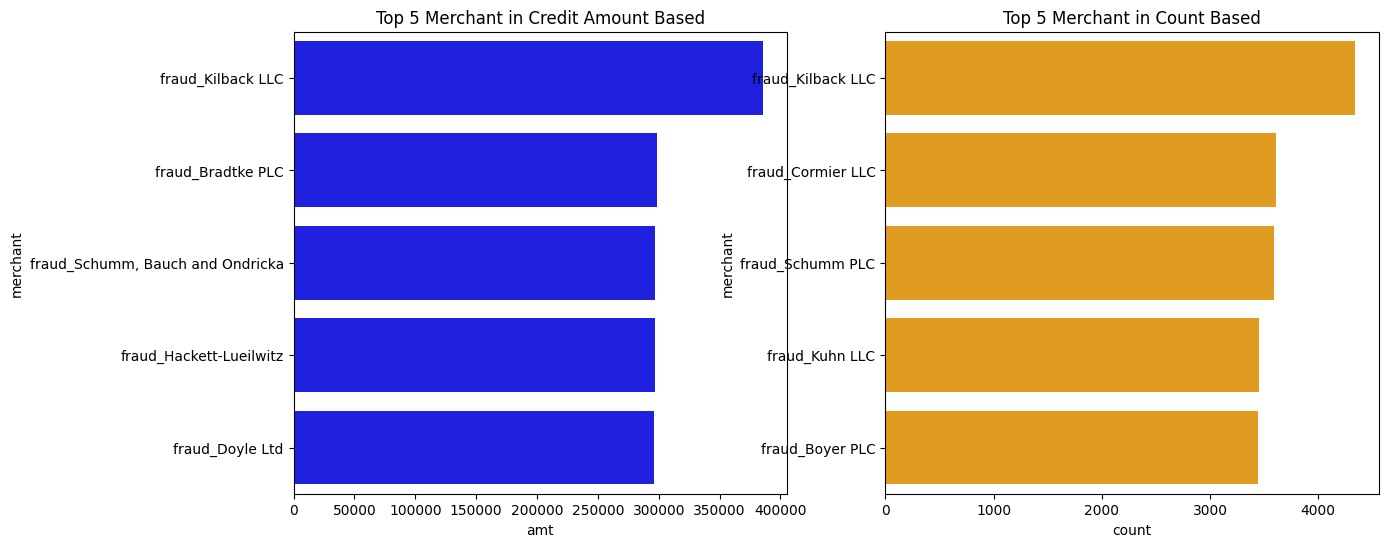

In [442]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(data=top_5_merchant,x=top_5_merchant['amt'],y=top_5_merchant['merchant'],color='blue')
plt.title('Top 5 Merchant in Credit Amount Based')
plt.subplot(1,2,2)
sns.countplot(data=credit,y=credit['merchant'],color='orange',order=credit['merchant'].value_counts().head(5).index)
plt.title('Top 5 Merchant in Count Based')

# **Category Groupby and Aggregate Function**

In [443]:
category_agg = credit.groupby(by='category').agg({'amt':'sum'}).reset_index()

In [444]:
top_5_category = category_agg.sort_values(by='amt',ascending=False,ignore_index=True).head()

In [445]:
top_5_category

,category,amt
0,grocery_pos,14280614.83
1,shopping_pos,9188130.39
2,shopping_net,8518297.81
3,gas_transport,8250579.67
4,home,7085696.24


Text(0.5, 1.0, 'Top 5 Category in Count Based')

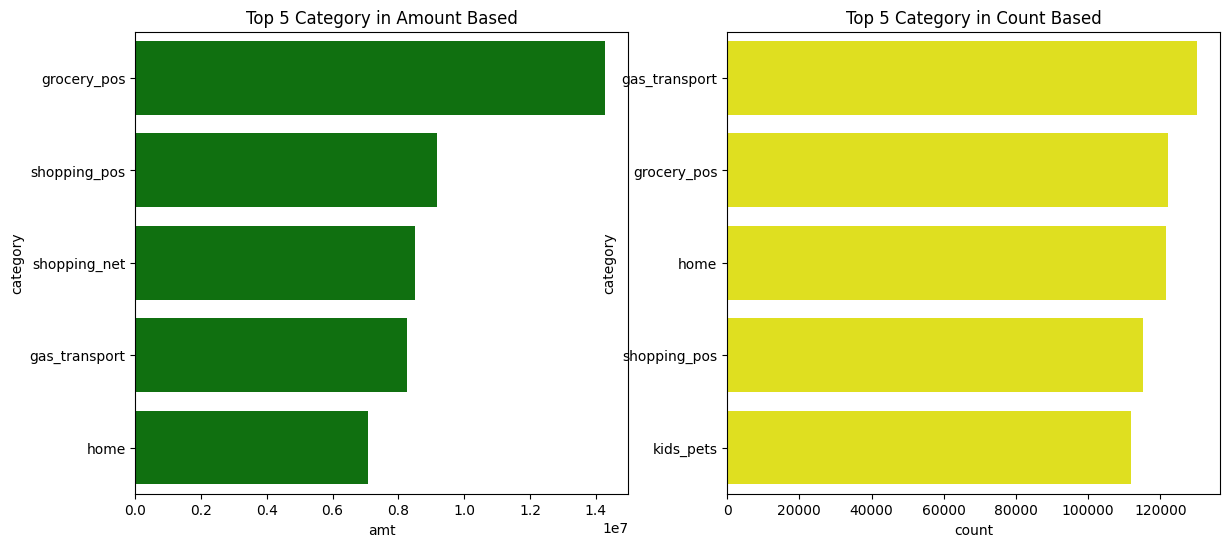

In [446]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(data=top_5_category,x=top_5_category['amt'],y=top_5_category['category'],color='green')
plt.title('Top 5 Category in Amount Based')
plt.subplot(1,2,2)
sns.countplot(data=credit,y=credit['category'],color='yellow',order=credit['category'].value_counts().head(5).index)
plt.title('Top 5 Category in Count Based')

# **Name Groupby and Aggregates Function**

In [447]:
name_agg = credit.groupby(by='Name').agg({'amt':'sum'}).reset_index()

In [448]:
top_5_name = name_agg.sort_values(by='amt',ascending=False,ignore_index=True).head()

In [449]:
top_5_name

,Name,amt
0,Jeffrey Smith,297298.93
1,Scott Martin,296551.65
2,Tammy Ayers,293237.85
3,Allison Allen,281699.02
4,Erin Chavez,276391.33


Text(0.5, 1.0, 'Top 5 Customer In Count Based')

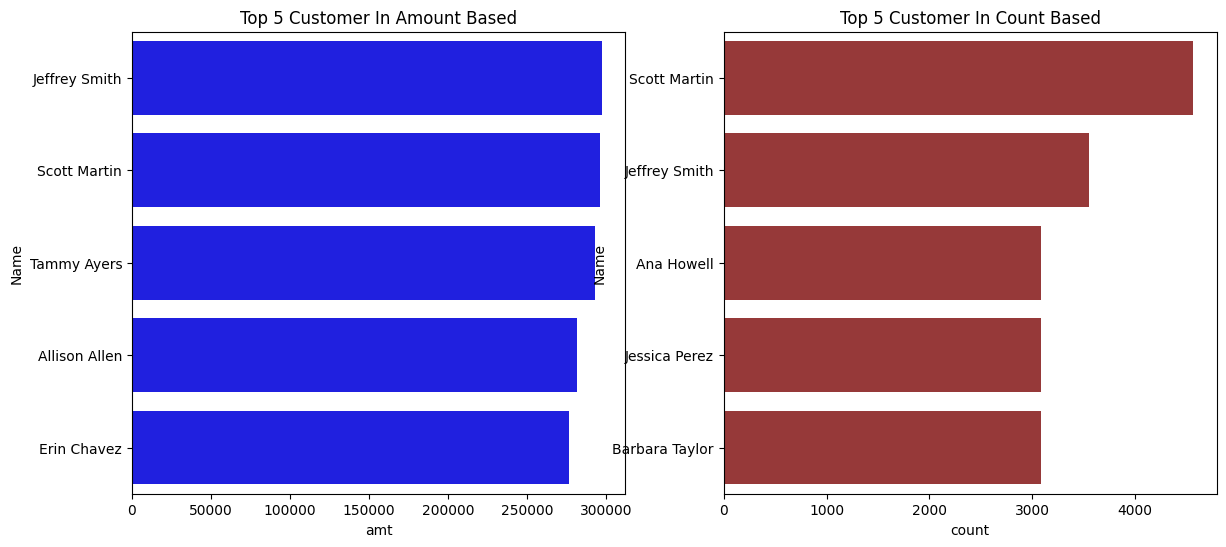

In [450]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(data=top_5_name,x='amt',y='Name',color='blue')
plt.title('Top 5 Customer In Amount Based')
plt.subplot(1,2,2)
sns.countplot(data=credit,y=credit['Name'],color='brown',order=credit['Name'].value_counts().head(5).index)
plt.title('Top 5 Customer In Count Based')

# **State Groupby and Aggregates Function**

In [451]:
state_agg = credit.groupby(by='state').agg({'amt':'sum'}).reset_index()

In [452]:
top_5_state = state_agg.sort_values(by='amt',ascending=False,ignore_index=True).head()

In [453]:
top_5_state

,state,amt
0,TX,6710562.46
1,NY,5927304.84
2,PA,5707719.79
3,CA,4092751.40
4,OH,3359434.82


*New Data Frame For City*

In [454]:
city_df = credit[credit['state']=='TX']

In [455]:
city_df['city'].value_counts().head()

city
San Antonio    5072
Houston        4103
Dallas         3590
Thrall         3036
Roma           3001
Name: count, dtype: int64

In [456]:
city_agg = city_df.groupby(by='city').agg({'amt':'sum'}).reset_index()

In [457]:
top_5_city = city_agg.sort_values(by='amt',ascending=False,ignore_index=True).head()

In [458]:
top_5_city

,city,amt
0,Houston,370260.57
1,San Antonio,320687.07
2,Dallas,287187.51
3,Grandview,273604.74
4,Roma,256085.47


Text(0.5, 1.0, 'Top 5 City of TX State in Amount Based')

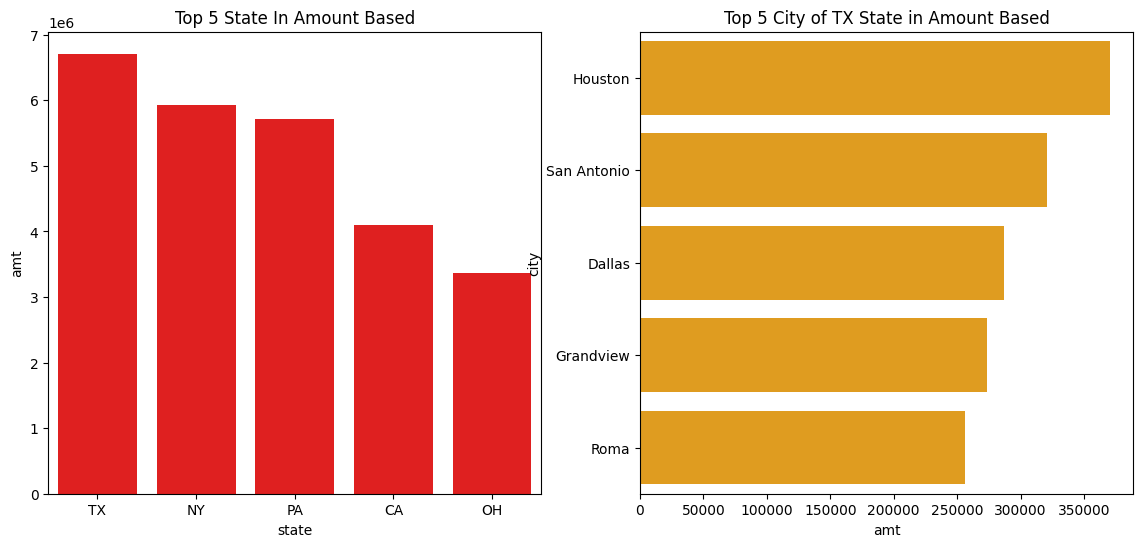

In [459]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(data=top_5_state,x='state',y='amt',color='red')
plt.title('Top 5 State In Amount Based')
plt.subplot(1,2,2)
sns.barplot(data=top_5_city,x='amt',y='city',color='orange')
plt.title('Top 5 City of TX State in Amount Based')

# **Job Groupby and Aggregates Function**

In [460]:
job_agg = credit.groupby(by='job').agg({'amt':'sum'}).reset_index()

In [461]:
top_5_job = job_agg.sort_values(by='amt',ascending=False,ignore_index=True).head()

In [462]:
top_5_job

,job,amt
0,Film/video editor,740797.98
1,Exhibition designer,645754.32
2,Naval architect,630605.13
3,"Surveyor, land/geomatics",609925.46
4,Environmental consultant,571718.42


Text(0.5, 1.0, 'Top 5 Job In Count Based')

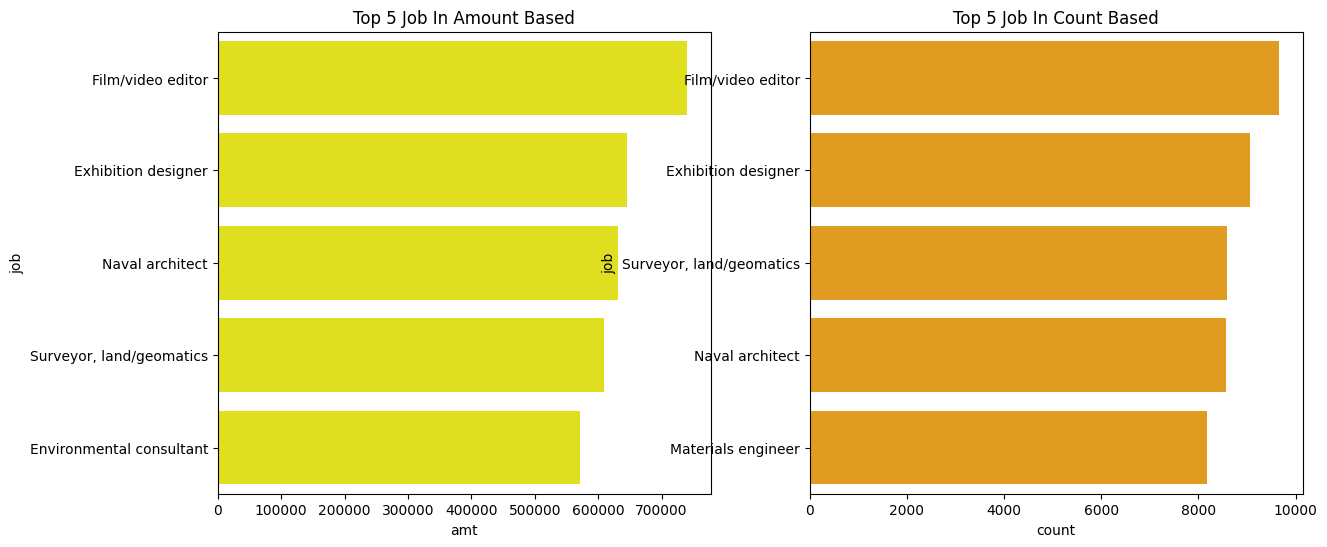

In [463]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(data=top_5_job,x='amt',y='job',color='yellow')
plt.title('Top 5 Job In Amount Based')
plt.subplot(1,2,2)
sns.countplot(data=credit,y=credit['job'],color='orange',order=credit['job'].value_counts().head(5).index)
plt.title('Top 5 Job In Count Based')

# **Contribution of Categorical Data**

Text(0.5, 1.0, 'Merchant Contribution')

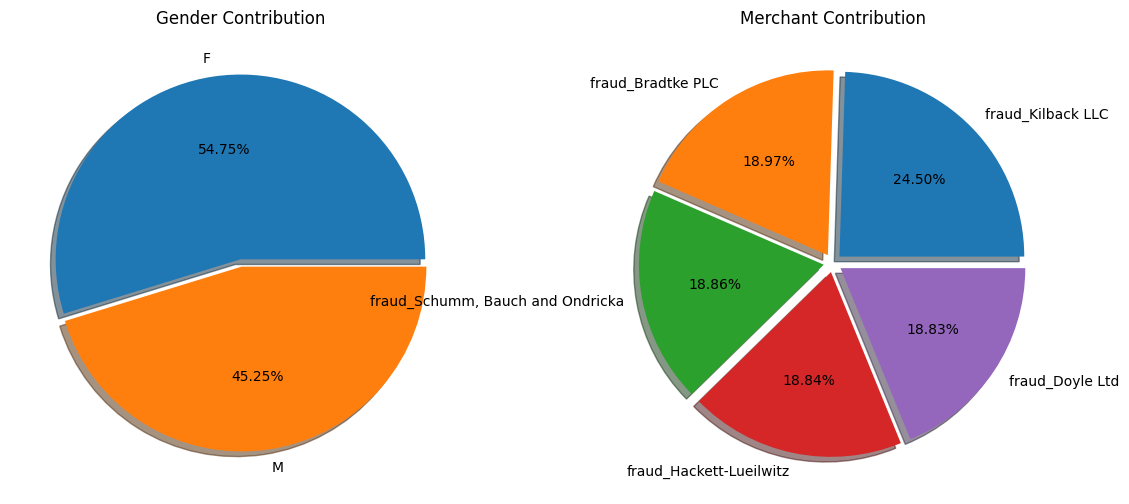

In [464]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie(x=credit['gender'].value_counts(),autopct='%1.2f%%',labels=credit['gender'].value_counts().index,explode=len(credit['gender'].value_counts())*[0.02],shadow=True,)
plt.title('Gender Contribution')
plt.subplot(1,2,2)
plt.pie(x=top_5_merchant['amt'],autopct='%1.2f%%',labels=top_5_merchant['merchant'],explode=len(top_5_merchant)*[0.05],shadow=True)
plt.title('Merchant Contribution')

Text(0.5, 1.0, 'Card Holder Contribution')

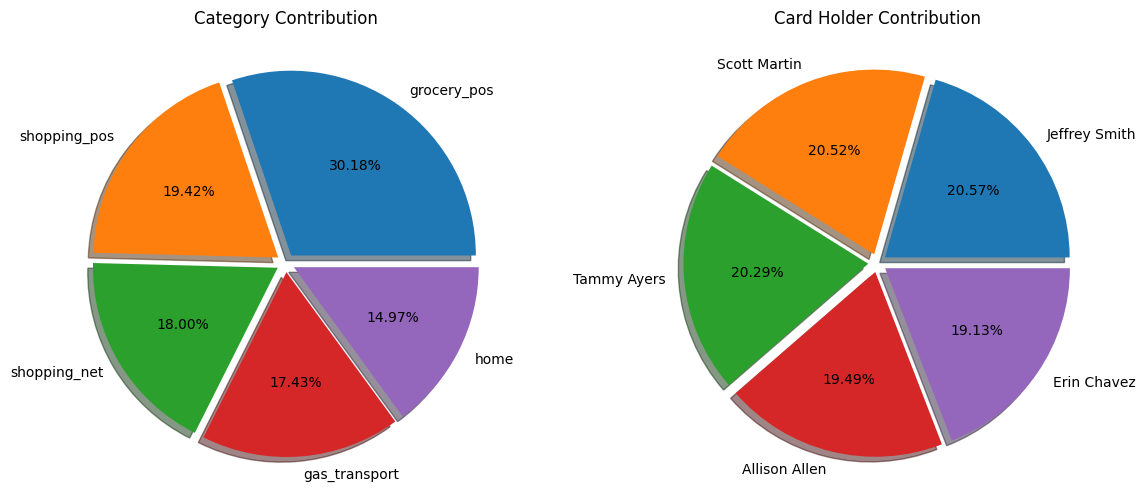

In [465]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie(x=top_5_category['amt'],autopct='%1.2f%%',labels=top_5_category['category'],explode=len(top_5_category)*[0.05],shadow=True)
plt.title('Category Contribution')
plt.subplot(1,2,2)
plt.pie(x=top_5_name['amt'],autopct='%1.2f%%',labels=top_5_name['Name'],explode=len(top_5_name)*[0.05],shadow=True)
plt.title('Card Holder Contribution')

Text(0.5, 1.0, 'Job Category Contribution')

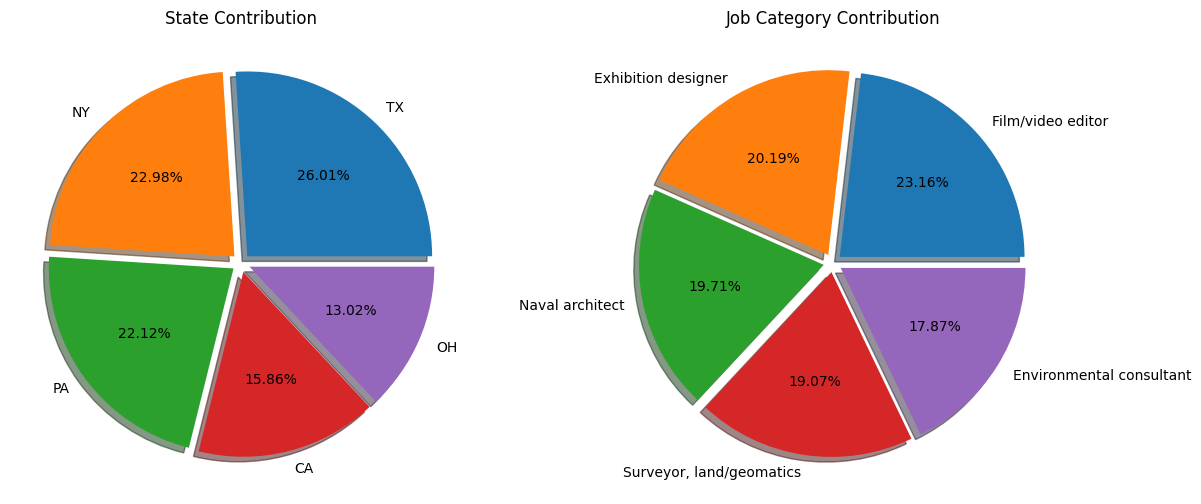

In [466]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie(x=top_5_state['amt'],autopct='%1.2f%%',labels=top_5_state['state'],explode=len(top_5_state)*[0.05],shadow=True)
plt.title('State Contribution')
plt.subplot(1,2,2)
plt.pie(x=top_5_job['amt'],autopct='%1.2f%%',labels=top_5_job['job'],explode=len(top_5_job)*[0.05],shadow=True)
plt.title('Job Category Contribution')

# **Distrubution Plot**

Text(0.5, 1.0, 'Distrubution Plot of Category')

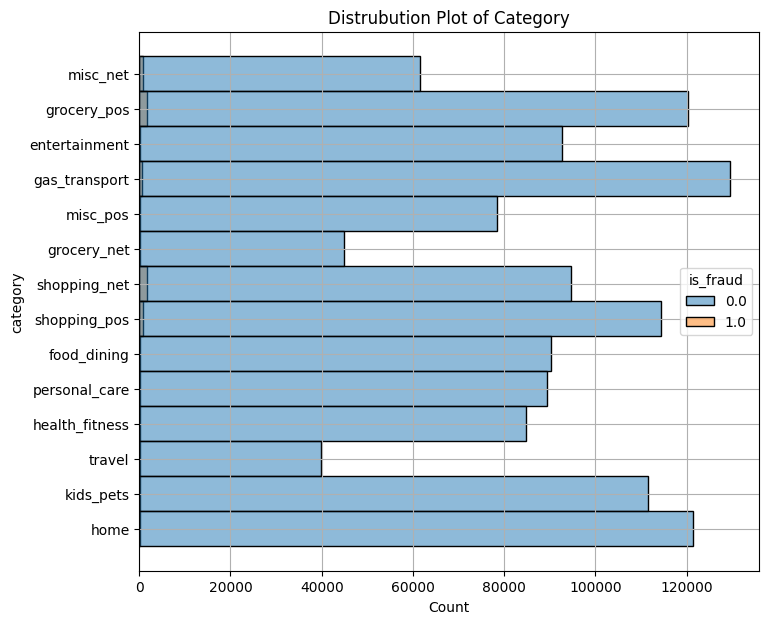

In [467]:
plt.figure(figsize=(8,7))
sns.histplot(data=credit,y=credit['category'],bins=10,hue=credit['is_fraud'])
plt.grid()
plt.title('Distrubution Plot of Category')

Text(0.5, 1.0, 'Boxplot of Amount')

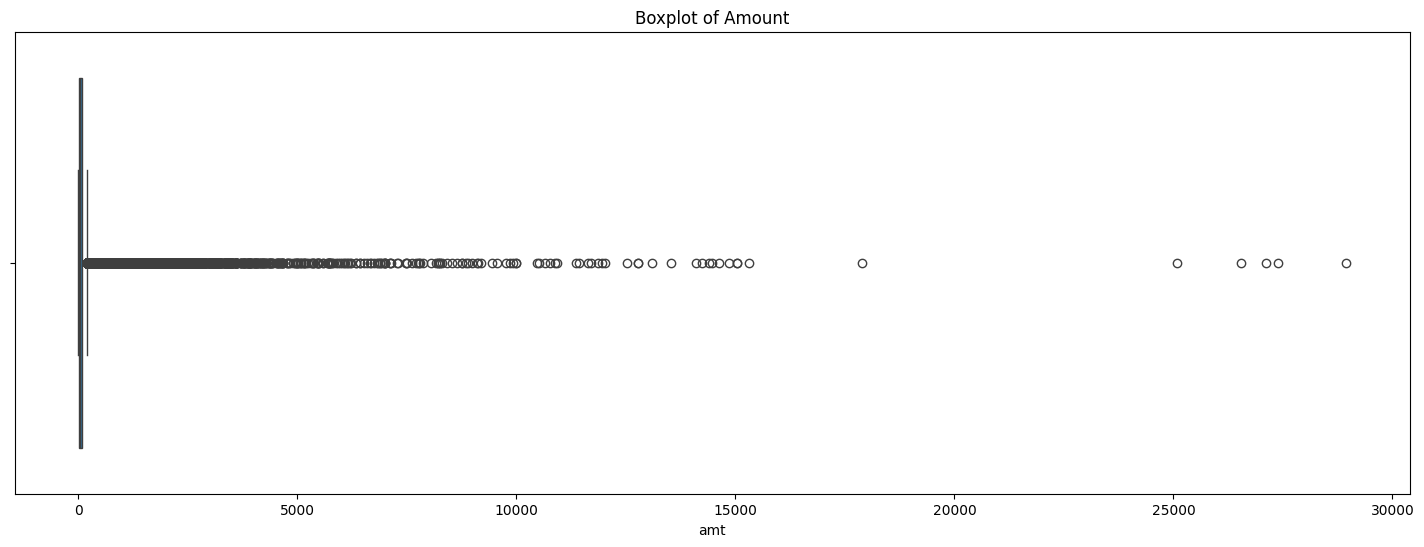

In [468]:
plt.figure(figsize=(18,6))
sns.boxplot(data=credit,x=credit['amt'])
plt.title('Boxplot of Amount')

# **Handleing Outlier Data**

In [469]:
first_quantile = credit['amt'].quantile(0.25)

In [470]:
third_quantile = credit['amt'].quantile(0.75)

In [471]:
iqr = third_quantile-first_quantile

In [472]:
iqr

73.46

In [473]:
first_quantile-1.5*iqr

-100.53999999999999

In [474]:
third_quantile+1.5*iqr

193.3

# **Data Preprocessing credit Dataframe**

*Base Data*

In [475]:
credit.drop(columns='Name',inplace=True)

In [476]:
credit.head(2)

,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1.325376e+09,36.011293,-82.048315,0.0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1.325376e+09,49.159047,-118.186462,0.0


# **Data Preprocessing of Credit_2 Data Frame**

*Analysis Data*

In [477]:
credit_2 = credit.copy()

In [478]:
credit_2.drop(columns='street',inplace=True)

In [479]:
credit_2.drop(columns='city',inplace=True)

In [480]:
credit_2.drop(columns='state',inplace=True)

In [481]:
credit_2.drop(columns='zip',inplace=True)

In [482]:
credit_2.drop(columns='city_pop',inplace=True)

In [483]:
credit_2.drop(columns='merchant',inplace=True)

# **Separating Datetime**

In [484]:
credit_2.head(2)

,trans_date_trans_time,category,amt,gender,lat,long,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,misc_net,4.97,F,36.0788,-81.1781,"Psychologist, counselling",1988-03-09,1.325376e+09,36.011293,-82.048315,0.0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,48.8878,-118.2105,Special educational needs teacher,1978-06-21,1.325376e+09,49.159047,-118.186462,0.0


In [485]:
import datetime

*Trans_year*

In [486]:
credit_2['trans_date_trans_time'] = pd.to_datetime(credit_2['trans_date_trans_time'])

In [487]:
credit_2['date'] = credit_2['trans_date_trans_time'].dt.date

In [488]:
credit_2['date'] = pd.to_datetime(credit_2['date'])

In [489]:
credit_2['trans_year'] = credit_2['date'].dt.year

*dob_year*

In [490]:
credit_2['dob'] = pd.to_datetime(credit_2['dob'])

In [491]:
credit_2['dob_year'] = credit_2['dob'].dt.year

# **Data Preprocessing**

In [492]:
credit_2.drop(columns='trans_date_trans_time',inplace=True)

In [493]:
credit_2.drop(columns='date',inplace=True)

In [494]:
credit_2.drop(columns='dob',inplace=True)

In [495]:
credit_2.drop(columns='unix_time',inplace=True)

In [496]:
credit_2.insert(loc=11,column='is_default',value=credit_2['is_fraud'])

In [497]:
credit_2.drop(columns='is_fraud',inplace=True)

# **Handling Missing Values**

In [498]:
credit_2.dropna(subset='dob_year',inplace=True)

# **Features Engineering**

In [499]:
credit_2.insert(loc=10,column='dob_Year',value=credit_2['dob_year'].astype(int))

In [500]:
credit_2.drop(columns='dob_year',inplace=True)

In [501]:
credit_2.insert(loc=3,column='Age',value=credit_2['trans_year']-credit_2['dob_Year'])

In [502]:
credit_2.drop(columns='trans_year',inplace=True)

In [503]:
credit_2.drop(columns='dob_Year',inplace=True)

In [504]:
credit_2['is_default'].replace({0.0:"No"},inplace=True)

In [505]:
credit_2['is_default'].replace({1.0:"Yes"},inplace=True)

# **Age Distrubution Plot**

Text(0.5, 1.0, 'Age Distrubution')

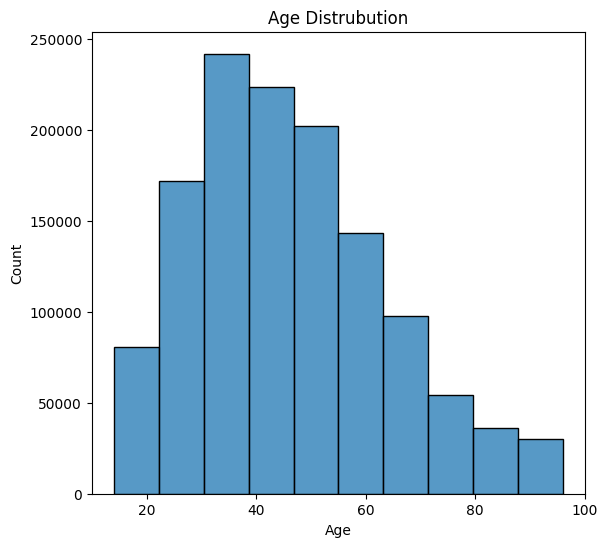

In [506]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(data=credit_2,x=credit_2['Age'],bins=10)
plt.title('Age Distrubution')
plt.subplot(1,2,2)
sns.kdeplot(data=credit_2,x=credit_2['Age'],hue=credit_2['is_default'],fill=True)
plt.title('Age KDE Plot')

# **Data Preprocessing and Label Encoding**

*category unique value*

In [507]:
category_agg.sort_values(by='category',inplace=True)

In [508]:
category_agg.head(2)

,category,amt
0,entertainment,5964996.00
1,food_dining,4618043.14


*job Unique Value*

In [509]:
job_agg.sort_values(by='job',inplace=True)

In [510]:
job_agg.head(2)

,job,amt
0,Academic librarian,71449.70
1,"Accountant, chartered",5342.77


# **Import Preprocessing From Sklearn**

In [511]:
from sklearn import preprocessing

In [512]:
from sklearn.preprocessing import LabelEncoder

In [513]:
le = LabelEncoder()

In [514]:
credit_2.head(2)

,category,amt,gender,Age,lat,long,job,merch_lat,merch_long,is_default
0,misc_net,4.97,F,31,36.0788,-81.1781,"Psychologist, counselling",36.011293,-82.048315,No
1,grocery_pos,107.23,F,41,48.8878,-118.2105,Special educational needs teacher,49.159047,-118.186462,No


# **Data Fit Transformation**

In [515]:
credit_3 = credit_2.copy()

In [516]:
credit_3.head(2)

,category,amt,gender,Age,lat,long,job,merch_lat,merch_long,is_default
0,misc_net,4.97,F,31,36.0788,-81.1781,"Psychologist, counselling",36.011293,-82.048315,No
1,grocery_pos,107.23,F,41,48.8878,-118.2105,Special educational needs teacher,49.159047,-118.186462,No


In [517]:
credit_3['category'] = le.fit_transform(credit_3['category'])

In [518]:
credit_3['gender'] = le.fit_transform(credit_3['gender'])

In [519]:
credit_3['job'] = le.fit_transform(credit_3['job'])

In [520]:
credit_3['is_default'] = le.fit_transform(credit_3['is_default'])

# **Plot Correlation**

In [521]:
correlation = credit_3.copy()

In [522]:
correlationship = correlation.corr()

# **Heat Map Graph**

Text(0.5, 1.0, 'Correlationship Between Columns')

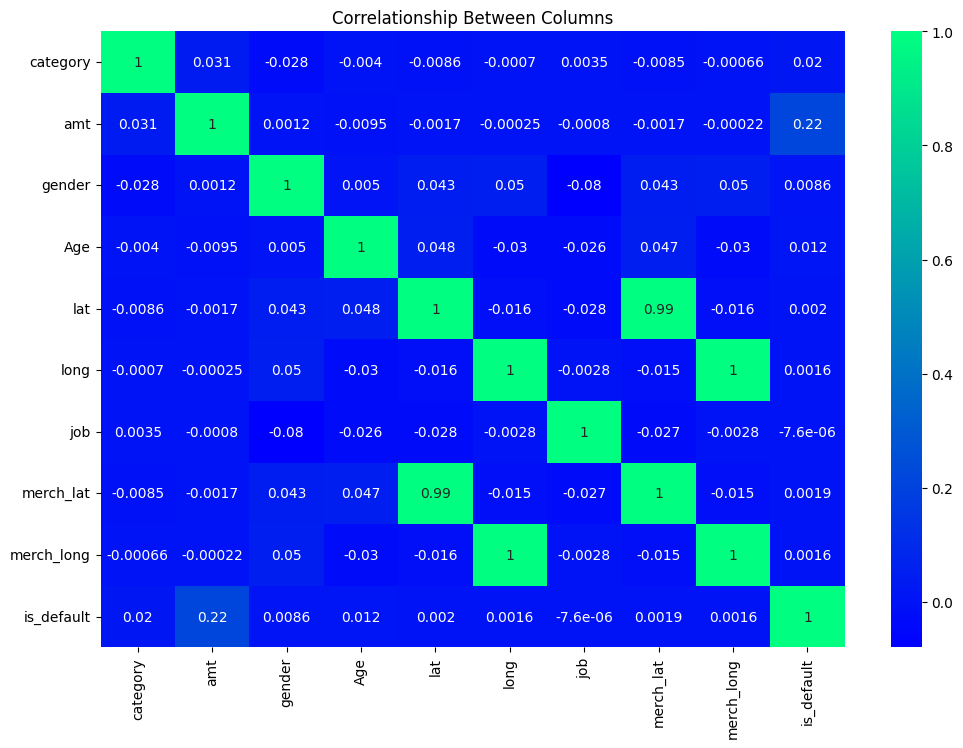

In [523]:
plt.figure(figsize=(12,8))
sns.heatmap(data=correlationship,cmap='winter',annot=True)
plt.title('Correlationship Between Columns')

# **Data Cleaning**

In [524]:
credit_3.dropna(subset='merch_lat',inplace=True)

In [528]:
credit_3['is_default'].replace({0:"No",1:'Yes'},inplace=True)

# **Defined Features (x) and Target (y) Variables**

In [531]:
x = credit_3[['category', 'amt', 'gender', 'Age', 'lat', 'long', 'job', 'merch_lat',
       'merch_long']]

In [532]:
y = credit_3['is_default']

# **Import Train Test Split Model**

In [533]:
from sklearn.model_selection import train_test_split

In [534]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=156)

# **Import Logistics Regression**

In [535]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

# **Train and Fit to Model**

In [536]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

*Model Intercept*

In [537]:
model.intercept_

array([-6.46190891])

*Model Coefficient*

In [538]:
model.coef_

array([[ 1.24716181e-02,  2.78737508e-03,  2.40978616e-01,
         1.09278821e-02,  5.29441601e-02, -3.51875638e-03,
         7.62760307e-05, -4.55420147e-02,  4.63169007e-03]])

# **Model Predict**

In [539]:
y_pred = model.predict(x_test)

In [540]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

# **Model Evaluation and Accuracy**

In [541]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [542]:
accuracy_score(y_test,y_pred)

0.9936006492999735

In [543]:
confusion_matrix(y_test,y_pred)

array([[254636,    154],
       [  1486,      0]])

In [544]:
model_report = classification_report(y_test,y_pred)

In [545]:
print(model_report)

              precision    recall  f1-score   support

          No       0.99      1.00      1.00    254790
         Yes       0.00      0.00      0.00      1486

    accuracy                           0.99    256276
   macro avg       0.50      0.50      0.50    256276
weighted avg       0.99      0.99      0.99    256276



# **Import Random Forest Classification**

In [546]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(max_leaf_nodes=8)

*forest_model Train and Fit*

In [547]:
forest_model.fit(x_train,y_train)

RandomForestClassifier(max_leaf_nodes=8)

*forest_model Predict*

In [548]:
y_forest_pred = forest_model.predict(x_test)

In [549]:
y_forest_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

*forest model evaluation and accuracy*

In [550]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [551]:
accuracy_score(y_test,y_forest_pred)

0.9942054659819882

In [552]:
confusion_matrix(y_test,y_forest_pred)

array([[254790,      0],
       [  1485,      1]])

# **Import Decision Tree Classification Model**

In [569]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree_model = DecisionTreeClassifier(max_leaf_nodes=8)

*tree_model Train and Fit*

In [570]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=8)

*tree_model Predict*

In [571]:
y_tree_predict = tree_model.predict(x_test)

In [572]:
y_tree_predict

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

*tree_model Evaluation and Accuracy*

In [573]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [574]:
accuracy_score(y_test,y_tree_predict)

0.9958716383898609

In [575]:
confusion_matrix(y_test,y_tree_predict)

array([[254384,    406],
       [   652,    834]])

# **Plot Tree Map**

In [576]:
from sklearn import tree

In [577]:
from sklearn.tree import plot_tree

Text(0.5, 1.0, 'Decision Tree Graph')

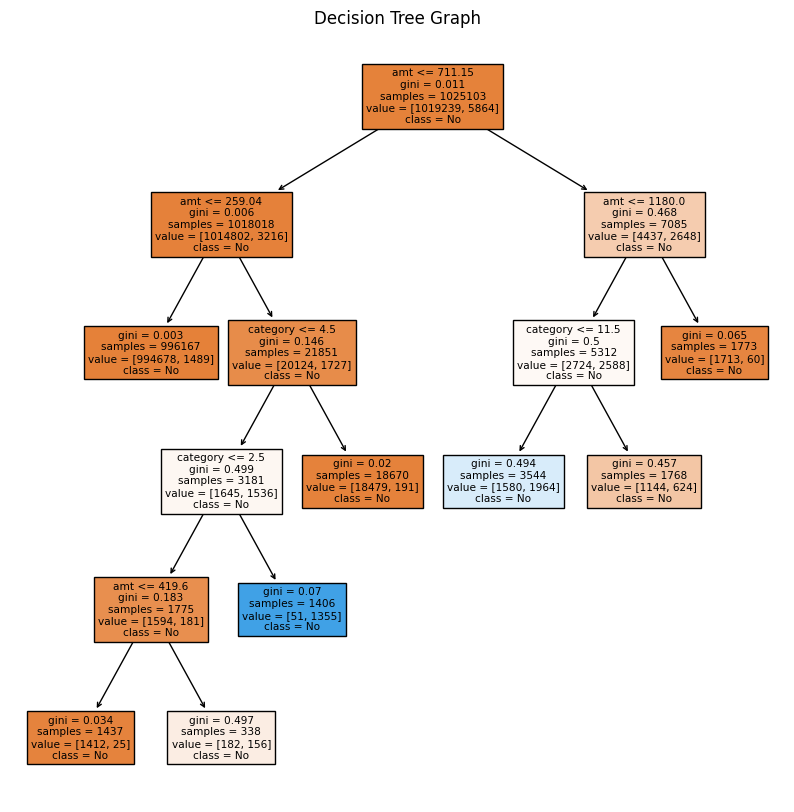

In [580]:
plt.figure(figsize=(10,10))
tree.plot_tree(decision_tree=tree_model,feature_names=credit_3.columns,class_names=credit_3['is_default'],filled=True,impurity=True)
plt.title('Decision Tree Graph')

# **Project Conclusion**

In [585]:
conclusion_report = pd.DataFrame(index=['Logistics Regression','Random Forest','Decision Tree'],columns=['Accuracy Score'],data=[0.9936,0.9942,0.9958])

In [586]:
conclusion_report

,Accuracy Score
Logistics Regression,0.9936
Random Forest,0.9942
Decision Tree,0.9958


In [ ]:
#a = float(input('Latitude :'))
#credit[credit['lat'] == a]

In [567]:
credit_3.shape

(1281379, 10)